In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/03_Mar.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,17.000000,75.000000,1,4,1,1844.0,1891.0,1964.0,1719.0,1540.0,1670.0,1856.416667,1713.0
1,16.916667,74.583333,1,4,1,1787.0,1879.0,1933.0,1679.0,1533.0,1680.0,1834.916667,1675.0
2,16.833333,74.166667,1,4,1,1789.0,1919.0,1950.0,1665.0,1520.0,1664.0,1812.083333,1676.0
3,16.750000,73.750000,1,4,1,1754.0,1885.0,1933.0,1645.0,1500.0,1636.0,1785.333333,1612.0
4,16.666667,73.333333,2,4,1,1713.0,1844.0,1891.0,1614.0,1482.0,1591.0,1763.000000,1623.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,20.532452,58.908200,23,1,0,2076.0,2081.0,2215.0,2300.0,2348.0,2270.0,2085.833333,2094.0
8924,20.532452,58.908200,24,1,0,2064.0,1914.0,2200.0,2274.0,2325.0,2273.0,2075.333333,2074.0
8925,20.532452,58.908200,24,1,0,2099.0,1985.0,2186.0,2248.0,2289.0,2244.0,2064.000000,2050.0
8926,20.200000,58.908200,24,1,0,2119.0,2039.0,2173.0,2205.0,2224.0,2192.0,2050.083333,2006.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   int64  
 3   B       8928 non-null   int64  
 4   C       8928 non-null   int64  
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 906.9 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   float64
 3   B       8928 non-null   float64
 4   C       8928 non-null   float64
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(13)
memory usage: 906.9 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 7392][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.888406,-0.824690,0.930411,-1.660902,-0.072393,0.632605,-0.426118,-0.259207,-0.000590,-0.840710,-1.481862,-0.949352,-0.398309
1,-1.021982,-0.838994,0.906669,-1.660902,-0.072393,0.632605,-0.626828,-0.301509,-0.109995,-0.985906,-1.508065,-0.911186,-0.477258
2,-1.018467,-0.853299,0.882927,-1.660902,-0.072393,0.632605,-0.619786,-0.160502,-0.049999,-1.036724,-1.556729,-0.972251,-0.561103
3,-1.243436,-0.867604,0.859184,-1.660902,-0.072393,0.632605,-0.743029,-0.280358,-0.109995,-1.109322,-1.631595,-1.079117,-0.659331
4,-1.204769,-0.881908,0.835442,-1.516457,-0.072393,0.632605,-0.887399,-0.424890,-0.258220,-1.221849,-1.698975,-1.250864,-0.741340


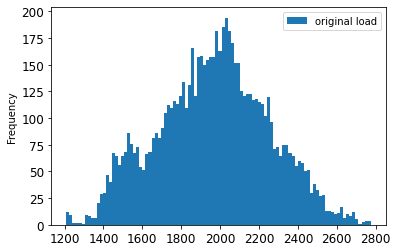

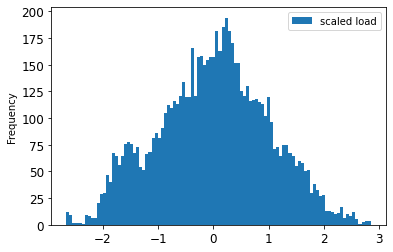

In [9]:
stlf_data[stlf_data.index <= 7392][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7392][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

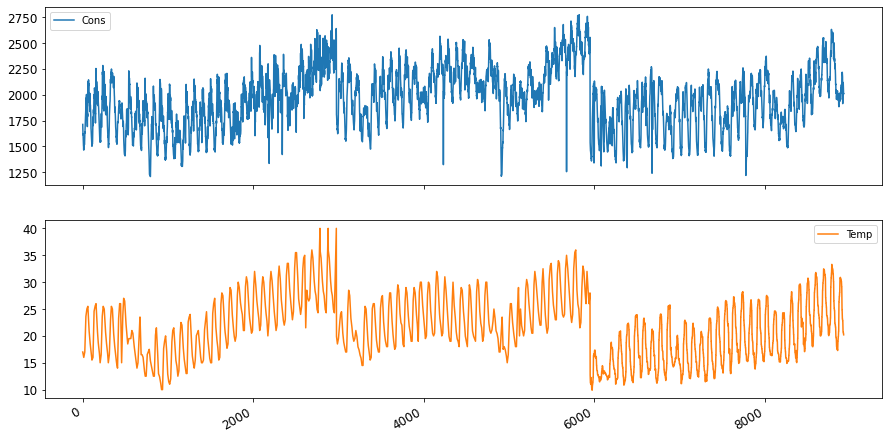

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-0.888406,-0.824690,0.930411,-1.660902,-0.072393,0.632605,-0.426118,-0.259207,-0.000590,-0.840710,-1.481862,-0.949352,-0.398309,-1.166103
1,-1.021982,-0.838994,0.906669,-1.660902,-0.072393,0.632605,-0.626828,-0.301509,-0.109995,-0.985906,-1.508065,-0.911186,-0.477258,-1.250466
2,-1.018467,-0.853299,0.882927,-1.660902,-0.072393,0.632605,-0.619786,-0.160502,-0.049999,-1.036724,-1.556729,-0.972251,-0.561103,-1.306709
3,-1.243436,-0.867604,0.859184,-1.660902,-0.072393,0.632605,-0.743029,-0.280358,-0.109995,-1.109322,-1.631595,-1.079117,-0.659331,-1.352406
4,-1.204769,-0.881908,0.835442,-1.516457,-0.072393,0.632605,-0.887399,-0.424890,-0.258220,-1.221849,-1.698975,-1.250864,-0.741340,-1.426224
5,-1.313739,-0.896213,0.811699,-1.516457,-0.072393,0.632605,-1.021206,-0.625825,-0.300570,-1.330746,-1.788815,-1.380629,-0.829163,-1.482466
6,-1.419194,-0.910517,0.787957,-1.516457,-0.072393,0.632605,-1.017685,-0.618774,-0.159403,-1.396084,-1.893629,-1.525661,-0.938407,-1.475436
7,-1.521133,-0.924822,0.764215,-1.516457,-0.072393,0.632605,-1.243044,-0.742155,-0.279395,-1.468682,-1.927319,-1.495128,-1.046121,-1.559800
8,-1.619557,-0.939126,0.740472,-1.372011,-0.072393,0.632605,-1.204310,-0.886687,-0.424091,-1.450532,-1.975982,-1.498944,-1.149856,-1.630103
9,-1.623072,-0.953431,0.716730,-1.372011,-0.072393,0.632605,-1.313468,-1.020644,-0.625254,-1.508611,-2.005929,-1.483678,-1.236456,-1.549254


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-0.888406,-0.824690,0.930411,-1.660902,-0.072393,0.632605,-0.426118,-0.259207,-0.000590,-0.840710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.888406
1,-1.021982,-0.838994,0.906669,-1.660902,-0.072393,0.632605,-0.626828,-0.301509,-0.109995,-0.985906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.888406,-1.021982
2,-1.018467,-0.853299,0.882927,-1.660902,-0.072393,0.632605,-0.619786,-0.160502,-0.049999,-1.036724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.888406,-1.021982,-1.018467
3,-1.243436,-0.867604,0.859184,-1.660902,-0.072393,0.632605,-0.743029,-0.280358,-0.109995,-1.109322,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.888406,-1.021982,-1.018467,-1.243436
4,-1.204769,-0.881908,0.835442,-1.516457,-0.072393,0.632605,-0.887399,-0.424890,-0.258220,-1.221849,...,NaN,NaN,NaN,NaN,NaN,-0.888406,-1.021982,-1.018467,-1.243436,-1.204769
5,-1.313739,-0.896213,0.811699,-1.516457,-0.072393,0.632605,-1.021206,-0.625825,-0.300570,-1.330746,...,NaN,NaN,NaN,NaN,-0.888406,-1.021982,-1.018467,-1.243436,-1.204769,-1.313739
6,-1.419194,-0.910517,0.787957,-1.516457,-0.072393,0.632605,-1.017685,-0.618774,-0.159403,-1.396084,...,NaN,NaN,NaN,-0.888406,-1.021982,-1.018467,-1.243436,-1.204769,-1.313739,-1.419194
7,-1.521133,-0.924822,0.764215,-1.516457,-0.072393,0.632605,-1.243044,-0.742155,-0.279395,-1.468682,...,NaN,NaN,-0.888406,-1.021982,-1.018467,-1.243436,-1.204769,-1.313739,-1.419194,-1.521133
8,-1.619557,-0.939126,0.740472,-1.372011,-0.072393,0.632605,-1.204310,-0.886687,-0.424091,-1.450532,...,NaN,-0.888406,-1.021982,-1.018467,-1.243436,-1.204769,-1.313739,-1.419194,-1.521133,-1.619557
9,-1.623072,-0.953431,0.716730,-1.372011,-0.072393,0.632605,-1.313468,-1.020644,-0.625254,-1.508611,...,-0.888406,-1.021982,-1.018467,-1.243436,-1.204769,-1.313739,-1.419194,-1.521133,-1.619557,-1.623072


In [13]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
10,-1.633618,-0.967735,0.692987,-1.372011,-0.072393,0.632605,-1.419105,-1.017119,-0.618196,-1.501351,...,-1.021982,-1.018467,-1.243436,-1.204769,-1.313739,-1.419194,-1.521133,-1.619557,-1.623072,-1.633618
11,-1.749618,-0.982040,0.669245,-1.372011,-0.072393,0.632605,-1.521221,-1.242730,-0.741717,-1.530390,...,-1.018467,-1.243436,-1.204769,-1.313739,-1.419194,-1.521133,-1.619557,-1.623072,-1.633618,-1.749618
12,-1.633618,-0.996345,0.645503,-1.227565,-0.072393,0.632605,-1.619816,-1.203953,-0.886413,-1.679216,...,-1.243436,-1.204769,-1.313739,-1.419194,-1.521133,-1.619557,-1.623072,-1.633618,-1.749618,-1.633618
13,-1.753133,-0.982040,0.626509,-1.227565,-0.072393,0.632605,-1.623337,-1.313233,-1.020522,-1.624767,...,-1.204769,-1.313739,-1.419194,-1.521133,-1.619557,-1.623072,-1.633618,-1.749618,-1.633618,-1.753133
14,-1.612527,-0.967735,0.607515,-1.227565,-0.072393,0.632605,-1.633901,-1.418989,-1.016993,-1.602988,...,-1.313739,-1.419194,-1.521133,-1.619557,-1.623072,-1.633618,-1.749618,-1.633618,-1.753133,-1.612527


In [14]:
train_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7283 entries, 10 to 7292
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cons_original  7283 non-null   float64
 1   Temp           7283 non-null   float64
 2   Hum            7283 non-null   float64
 3   A              7283 non-null   float64
 4   B              7283 non-null   float64
 5   C              7283 non-null   float64
 6   D              7283 non-null   float64
 7   E              7283 non-null   float64
 8   F              7283 non-null   float64
 9   G              7283 non-null   float64
 10  H              7283 non-null   float64
 11  I              7283 non-null   float64
 12  J              7283 non-null   float64
 13  y_t+100        7283 non-null   float64
 14  Cons_t-10      7283 non-null   float64
 15  Cons_t-9       7283 non-null   float64
 16  Cons_t-8       7283 non-null   float64
 17  Cons_t-7       7283 non-null   float64
 18  Cons_t-

In [15]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
10,-1.510588
11,-1.507072
12,-1.535194
13,-1.556284
14,-1.507072
...,...
7288,-0.740770
7289,-0.825133
7290,-0.979800
7291,-1.092285


In [16]:
X_train = train_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
10,-1.633618,-1.633618,-1.623072,-1.619557,-1.521133,-1.419194,-1.313739,-1.204769,-1.243436,-1.018467,...,-1.372011,-0.072393,0.632605,-1.419105,-1.017119,-0.618196,-1.501351,-1.946035,-1.502761,-1.324585
11,-1.749618,-1.749618,-1.633618,-1.623072,-1.619557,-1.521133,-1.419194,-1.313739,-1.204769,-1.243436,...,-1.372011,-0.072393,0.632605,-1.521221,-1.242730,-0.741717,-1.530390,-1.961009,-1.548560,-1.412103
12,-1.633618,-1.633618,-1.749618,-1.633618,-1.623072,-1.619557,-1.521133,-1.419194,-1.313739,-1.204769,...,-1.227565,-0.072393,0.632605,-1.619816,-1.203953,-0.886413,-1.679216,-2.065822,-1.663059,-1.476976
13,-1.753133,-1.753133,-1.633618,-1.749618,-1.633618,-1.623072,-1.619557,-1.521133,-1.419194,-1.313739,...,-1.227565,-0.072393,0.632605,-1.623337,-1.313233,-1.020522,-1.624767,-2.136945,-1.571460,-1.540625
14,-1.612527,-1.612527,-1.753133,-1.633618,-1.749618,-1.633618,-1.623072,-1.619557,-1.521133,-1.419194,...,-1.227565,-0.072393,0.632605,-1.633901,-1.418989,-1.016993,-1.602988,-2.103255,-1.552377,-1.592339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7288,-0.723194,-0.723194,-0.691558,-0.695073,-0.413861,-0.336527,-0.280285,-0.111558,0.057169,0.155594,...,1.516906,0.432991,0.632605,-0.334566,0.160289,0.468790,-0.757222,-0.714479,-0.697455,-0.207974
7289,-0.726709,-0.726709,-0.723194,-0.691558,-0.695073,-0.413861,-0.336527,-0.280285,-0.111558,0.057169,...,1.516906,0.432991,0.632605,-0.412033,0.061584,0.320565,-0.702774,-0.628382,-0.674555,-0.298551
7290,-0.600164,-0.600164,-0.726709,-0.723194,-0.691558,-0.695073,-0.413861,-0.336527,-0.280285,-0.111558,...,1.516906,0.432991,0.632605,-0.693732,-0.107624,0.235865,-0.612027,-0.725709,-0.628756,-0.370768
7291,-0.631800,-0.631800,-0.600164,-0.726709,-0.723194,-0.691558,-0.695073,-0.413861,-0.336527,-0.280285,...,1.516906,0.432991,0.632605,-0.690210,-0.276832,0.077052,-0.691884,-0.763142,-0.590590,-0.431969


In [17]:
X_train=np.atleast_3d(X_train)
X_train.shape

(7283, 24, 1)

In [18]:

#subsequences=2
#timesteps=X_train.shape[1]//subsequences
X_train=X_train.reshape(7283,2,1,12)
#print(X_train.shape)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,1584.0,14.762452,80.189580,1.0,7.0,0.0,1731.0,1764.0,1802.0,1530.0,1551.0,1534.0,1720.166667
7394,1575.0,14.257452,82.334425,1.0,7.0,0.0,1687.0,1798.0,1752.0,1507.0,1542.0,1504.0,1705.416667
7395,1558.0,13.752452,84.479270,1.0,7.0,0.0,1655.0,1781.0,1764.0,1530.0,1520.0,1516.0,1688.250000
7396,1550.0,13.752452,84.479270,2.0,7.0,0.0,1621.0,1755.0,1750.0,1508.0,1503.0,1499.0,1671.583333
7397,1534.0,13.752452,84.479270,2.0,7.0,0.0,1584.0,1731.0,1764.0,1488.0,1483.0,1490.0,1652.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8349,1874.0,18.282452,88.859230,24.0,2.0,1.0,1891.0,2006.0,2119.0,1673.0,1768.0,1946.0,1963.000000
8350,1863.0,18.522451,88.859230,24.0,2.0,1.0,1926.0,1971.0,2092.0,1630.0,1742.0,1912.0,1943.916667
8351,1835.0,18.522451,87.867065,24.0,2.0,1.0,1922.0,1940.0,2070.0,1611.0,1721.0,1869.0,1924.333333
8352,1752.0,18.522451,87.867065,1.0,3.0,1.0,1916.0,1909.0,2039.0,1599.0,1682.0,1815.0,1900.416667


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,-1.283844,-1.175629,0.879314,-1.658081,1.441195,-1.22847,-0.626235,-0.476839,-0.304854,-1.505034,-1.431265,-1.432321,-0.704697
7394,-1.323918,-1.288981,0.993375,-1.658081,1.441195,-1.22847,-0.821892,-0.325698,-0.527056,-1.606368,-1.470221,-1.558011,-0.773332
7395,-1.399612,-1.402333,1.107437,-1.658081,1.441195,-1.22847,-0.964188,-0.401269,-0.473727,-1.505034,-1.565445,-1.507735,-0.853212
7396,-1.435233,-1.402333,1.107437,-1.513750,1.441195,-1.22847,-1.115378,-0.516847,-0.535944,-1.601962,-1.639027,-1.578959,-0.930766
7397,-1.506476,-1.402333,1.107437,-1.513750,1.441195,-1.22847,-1.279908,-0.623535,-0.473727,-1.690079,-1.725594,-1.616666,-1.019953
7398,-1.564360,-1.413556,1.099686,-1.513750,1.441195,-1.22847,-1.319929,-0.819130,-0.322630,-1.663644,-1.734251,-1.599907,-1.127365
7399,-1.559907,-1.424779,1.091935,-1.513750,1.441195,-1.22847,-1.395524,-0.961381,-0.398178,-1.668050,-1.751564,-1.658562,-1.227797
7400,-1.648960,-1.424779,1.091935,-1.369419,1.441195,-1.22847,-1.431098,-1.112522,-0.513723,-1.831065,-1.829475,-1.692079,-1.325903
7401,-1.666770,-1.424779,1.091935,-1.369419,1.441195,-1.22847,-1.502247,-1.276999,-0.620380,-1.778195,-1.885744,-1.754924,-1.416253
7402,-1.706844,-1.569555,1.118036,-1.369419,1.441195,-1.22847,-1.560054,-1.317007,-0.815918,-1.817847,-1.924699,-1.842906,-1.493031


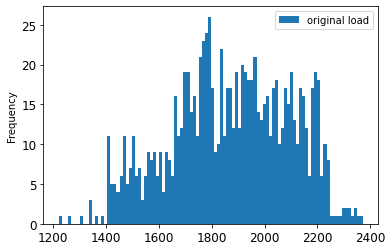

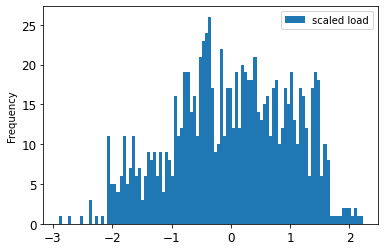

In [21]:
stlf_data[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7393) & (valid.index <=8353)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7393,-1.283844,-1.175629,0.879314,-1.658081,1.441195,-1.22847,-0.626235,-0.476839,-0.304854,-1.505034,-1.431265,-1.432321,-0.704697,-1.559907
7394,-1.323918,-1.288981,0.993375,-1.658081,1.441195,-1.22847,-0.821892,-0.325698,-0.527056,-1.606368,-1.470221,-1.558011,-0.773332,-1.439686
7395,-1.399612,-1.402333,1.107437,-1.658081,1.441195,-1.22847,-0.964188,-0.401269,-0.473727,-1.505034,-1.565445,-1.507735,-0.853212,-1.546549
7396,-1.435233,-1.402333,1.107437,-1.513750,1.441195,-1.22847,-1.115378,-0.516847,-0.535944,-1.601962,-1.639027,-1.578959,-0.930766,-1.604433
7397,-1.506476,-1.402333,1.107437,-1.513750,1.441195,-1.22847,-1.279908,-0.623535,-0.473727,-1.690079,-1.725594,-1.616666,-1.019953,-1.644507
7398,-1.564360,-1.413556,1.099686,-1.513750,1.441195,-1.22847,-1.319929,-0.819130,-0.322630,-1.663644,-1.734251,-1.599907,-1.127365,-1.822612
7399,-1.559907,-1.424779,1.091935,-1.513750,1.441195,-1.22847,-1.395524,-0.961381,-0.398178,-1.668050,-1.751564,-1.658562,-1.227797,-1.786991
7400,-1.648960,-1.424779,1.091935,-1.369419,1.441195,-1.22847,-1.431098,-1.112522,-0.513723,-1.831065,-1.829475,-1.692079,-1.325903,-1.751370
7401,-1.666770,-1.424779,1.091935,-1.369419,1.441195,-1.22847,-1.502247,-1.276999,-0.620380,-1.778195,-1.885744,-1.754924,-1.416253,-1.835970
7402,-1.706844,-1.569555,1.118036,-1.369419,1.441195,-1.22847,-1.560054,-1.317007,-0.815918,-1.817847,-1.924699,-1.842906,-1.493031,-1.791444


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7393,-1.283844,-1.175629,0.879314,-1.658081,1.441195,-1.22847,-0.626235,-0.476839,-0.304854,-1.505034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.283844
7394,-1.323918,-1.288981,0.993375,-1.658081,1.441195,-1.22847,-0.821892,-0.325698,-0.527056,-1.606368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.283844,-1.323918
7395,-1.399612,-1.402333,1.107437,-1.658081,1.441195,-1.22847,-0.964188,-0.401269,-0.473727,-1.505034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.283844,-1.323918,-1.399612
7396,-1.435233,-1.402333,1.107437,-1.513750,1.441195,-1.22847,-1.115378,-0.516847,-0.535944,-1.601962,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.283844,-1.323918,-1.399612,-1.435233
7397,-1.506476,-1.402333,1.107437,-1.513750,1.441195,-1.22847,-1.279908,-0.623535,-0.473727,-1.690079,...,NaN,NaN,NaN,NaN,NaN,-1.283844,-1.323918,-1.399612,-1.435233,-1.506476
7398,-1.564360,-1.413556,1.099686,-1.513750,1.441195,-1.22847,-1.319929,-0.819130,-0.322630,-1.663644,...,NaN,NaN,NaN,NaN,-1.283844,-1.323918,-1.399612,-1.435233,-1.506476,-1.564360
7399,-1.559907,-1.424779,1.091935,-1.513750,1.441195,-1.22847,-1.395524,-0.961381,-0.398178,-1.668050,...,NaN,NaN,NaN,-1.283844,-1.323918,-1.399612,-1.435233,-1.506476,-1.564360,-1.559907
7400,-1.648960,-1.424779,1.091935,-1.369419,1.441195,-1.22847,-1.431098,-1.112522,-0.513723,-1.831065,...,NaN,NaN,-1.283844,-1.323918,-1.399612,-1.435233,-1.506476,-1.564360,-1.559907,-1.648960
7401,-1.666770,-1.424779,1.091935,-1.369419,1.441195,-1.22847,-1.502247,-1.276999,-0.620380,-1.778195,...,NaN,-1.283844,-1.323918,-1.399612,-1.435233,-1.506476,-1.564360,-1.559907,-1.648960,-1.666770
7402,-1.706844,-1.569555,1.118036,-1.369419,1.441195,-1.22847,-1.560054,-1.317007,-0.815918,-1.817847,...,-1.283844,-1.323918,-1.399612,-1.435233,-1.506476,-1.564360,-1.559907,-1.648960,-1.666770,-1.706844


In [24]:
valid_shifted = valid_shifted.dropna(how='any')
valid_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7403,-1.778086,-1.714332,1.144137,-1.369419,1.441195,-1.22847,-1.555608,-1.392578,-0.958127,-1.809036,...,-1.323918,-1.399612,-1.435233,-1.506476,-1.564360,-1.559907,-1.648960,-1.666770,-1.706844,-1.778086
7404,-1.822612,-1.714332,1.144137,-1.225087,1.441195,-1.22847,-1.644543,-1.428140,-1.109225,-1.879529,...,-1.399612,-1.435233,-1.506476,-1.564360,-1.559907,-1.648960,-1.666770,-1.706844,-1.778086,-1.822612
7405,-1.867138,-1.714332,1.144137,-1.225087,1.441195,-1.22847,-1.662330,-1.499266,-1.273654,-1.817847,...,-1.435233,-1.506476,-1.564360,-1.559907,-1.648960,-1.666770,-1.706844,-1.778086,-1.822612,-1.867138
7406,-1.849328,-1.751367,1.186083,-1.225087,1.441195,-1.22847,-1.702351,-1.557055,-1.313650,-1.826659,...,-1.506476,-1.564360,-1.559907,-1.648960,-1.666770,-1.706844,-1.778086,-1.822612,-1.867138,-1.849328
7407,-2.076412,-1.788403,1.228029,-1.225087,1.441195,-1.22847,-1.773499,-1.552610,-1.389199,-1.835471,...,-1.564360,-1.559907,-1.648960,-1.666770,-1.706844,-1.778086,-1.822612,-1.867138,-1.849328,-2.076412


In [25]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7403,-1.809254
7404,-1.818159
7405,-1.862686
7406,-1.800349
7407,-1.738012
...,...
8249,0.007418
8250,-0.041561
8251,-0.166235
8252,-0.535803


In [26]:
X_valid = valid_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
7403,-1.778086,-1.778086,-1.706844,-1.666770,-1.648960,-1.559907,-1.564360,-1.506476,-1.435233,-1.399612,...,-1.369419,1.441195,-1.22847,-1.555608,-1.392578,-0.958127,-1.809036,-1.950669,-1.951837,-1.563605
7404,-1.822612,-1.822612,-1.778086,-1.706844,-1.666770,-1.648960,-1.559907,-1.564360,-1.506476,-1.435233,...,-1.225087,1.441195,-1.22847,-1.644543,-1.428140,-1.109225,-1.879529,-2.011266,-1.851286,-1.624873
7405,-1.867138,-1.867138,-1.822612,-1.778086,-1.706844,-1.666770,-1.648960,-1.559907,-1.564360,-1.506476,...,-1.225087,1.441195,-1.22847,-1.662330,-1.499266,-1.273654,-1.817847,-2.024251,-1.880613,-1.675670
7406,-1.849328,-1.849328,-1.867138,-1.822612,-1.778086,-1.706844,-1.666770,-1.648960,-1.559907,-1.564360,...,-1.225087,1.441195,-1.22847,-1.702351,-1.557055,-1.313650,-1.826659,-2.011266,-1.918320,-1.721427
7407,-2.076412,-2.076412,-1.849328,-1.867138,-1.822612,-1.778086,-1.706844,-1.666770,-1.648960,-1.559907,...,-1.225087,1.441195,-1.22847,-1.773499,-1.552610,-1.389199,-1.835471,-1.976639,-1.893182,-1.780368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,-0.905371,-0.905371,-0.949897,-0.820771,-0.731718,-0.611497,-0.580329,-0.420034,-0.384413,-0.357698,...,1.517204,-1.256834,-1.22847,-0.608447,-0.352370,-0.135980,-0.407985,0.235155,0.507483,-0.522833
8250,-0.758434,-0.758434,-0.905371,-0.949897,-0.820771,-0.731718,-0.611497,-0.580329,-0.420034,-0.384413,...,1.517204,-1.256834,-1.22847,-0.728510,-0.379042,-0.051543,-0.302246,0.438588,0.687638,-0.583713
8251,-0.705003,-0.705003,-0.758434,-0.905371,-0.949897,-0.820771,-0.731718,-0.611497,-0.580329,-0.420034,...,1.517204,-1.256834,-1.22847,-0.817445,-0.414605,-0.064876,-0.284622,0.507842,0.582896,-0.638776
8252,-0.789602,-0.789602,-0.705003,-0.758434,-0.905371,-0.949897,-0.820771,-0.731718,-0.611497,-0.580329,...,1.661535,-1.256834,-1.22847,-0.946401,-0.574637,-0.140424,-0.482884,0.451573,0.570328,-0.694615


In [27]:
X_valid=np.atleast_3d(X_valid)
X_valid.shape

(851, 24, 1)

In [28]:
#subsequences=2
#X_valid=X_valid.shape[1]//subsequences
X_valid=X_valid.reshape(851,2,1,12)
print(X_valid.shape)

(851, 2, 1, 12)


In [29]:
#from keras.layers import RepeatVector
from keras.layers import BatchNormalization
from keras.layers import Input

model = models.Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu'),input_shape=(None,1,12)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Flatten()))
#model.add(RepeatVector(5629))
model.add((LSTM(128,activation='linear')))
#model.add(Flatten())
#model.add(GRU(300))
#model.add(Dense(150,activation='linear'))
#model.add(Dense(75,activation='linear'))
#model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(300)))
model.add(Dense(1,activation='linear'))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.00001)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 1, 128)      1664      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 1, 128)      16512     
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 1, 128)      0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 128)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 149,889
Trainable params: 149,889
Non-trainable params: 0
__________________________________________________

In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:

history = model.fit(X_train,
          y_train,
          batch_size=250,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop],
          )


Epoch 1/300
30/30 [==============================] - 3s 84ms/step - loss: 0.9514 - val_loss: 0.9038
Epoch 2/300
30/30 [==============================] - 1s 42ms/step - loss: 0.9126 - val_loss: 0.8798
Epoch 3/300
30/30 [==============================] - 1s 43ms/step - loss: 0.8758 - val_loss: 0.8573
Epoch 4/300
30/30 [==============================] - 1s 43ms/step - loss: 0.8400 - val_loss: 0.8362
Epoch 5/300
30/30 [==============================] - 1s 42ms/step - loss: 0.8055 - val_loss: 0.8160
Epoch 6/300
30/30 [==============================] - 1s 46ms/step - loss: 0.7713 - val_loss: 0.7974
Epoch 7/300
30/30 [==============================] - 1s 42ms/step - loss: 0.7383 - val_loss: 0.7803
Epoch 8/300
30/30 [==============================] - 1s 43ms/step - loss: 0.7070 - val_loss: 0.7649
Epoch 9/300
30/30 [==============================] - 1s 44ms/step - loss: 0.6775 - val_loss: 0.7516
Epoch 10/300
30/30 [==============================] - 1s 44ms/step - loss: 0.6501 - val_loss: 0.7404

Epoch 82/300
30/30 [==============================] - 1s 44ms/step - loss: 0.3114 - val_loss: 0.3479
Epoch 83/300
30/30 [==============================] - 1s 43ms/step - loss: 0.3106 - val_loss: 0.3471
Epoch 84/300
30/30 [==============================] - 1s 41ms/step - loss: 0.3098 - val_loss: 0.3465
Epoch 85/300
30/30 [==============================] - 1s 41ms/step - loss: 0.3089 - val_loss: 0.3443
Epoch 86/300
30/30 [==============================] - 1s 42ms/step - loss: 0.3082 - val_loss: 0.3446
Epoch 87/300
30/30 [==============================] - 1s 41ms/step - loss: 0.3075 - val_loss: 0.3443
Epoch 88/300
30/30 [==============================] - 1s 42ms/step - loss: 0.3068 - val_loss: 0.3415
Epoch 89/300
30/30 [==============================] - 1s 41ms/step - loss: 0.3060 - val_loss: 0.3441
Epoch 90/300
30/30 [==============================] - 1s 43ms/step - loss: 0.3054 - val_loss: 0.3418
Epoch 91/300
30/30 [==============================] - 1s 41ms/step - loss: 0.3048 - val_los

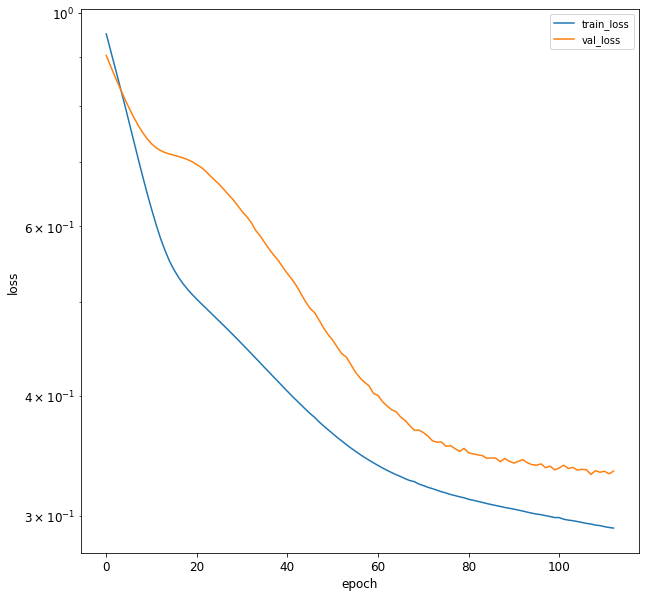

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8354,1724.0,17.742452,90.436797,1.0,3.0,1.0,1863.0,1926.0,1971.0,1556.0,1635.0,1806.0,1856.750000
8355,1709.0,16.962452,93.006530,1.0,3.0,1.0,1835.0,1922.0,1940.0,1539.0,1622.0,1789.0,1837.500000
8356,1710.0,16.962452,93.006530,2.0,3.0,1.0,1752.0,1916.0,1909.0,1505.0,1625.0,1778.0,1820.916667
8357,1713.0,16.962452,93.006530,2.0,3.0,1.0,1729.0,1874.0,1891.0,1510.0,1602.0,1757.0,1806.083333
8358,1721.0,16.827452,92.880650,2.0,3.0,1.0,1724.0,1863.0,1926.0,1514.0,1623.0,1735.0,1789.000000
8359,1717.0,16.692451,92.754770,2.0,3.0,1.0,1709.0,1835.0,1922.0,1505.0,1600.0,1710.0,1771.916667
8360,1697.0,16.692451,92.754770,3.0,3.0,1.0,1710.0,1752.0,1916.0,1517.0,1587.0,1705.0,1753.666667
8361,1684.0,16.692451,92.754770,3.0,3.0,1.0,1713.0,1729.0,1874.0,1511.0,1571.0,1716.0,1737.833333
8362,1671.0,16.307452,93.064005,3.0,3.0,1.0,1721.0,1724.0,1863.0,1502.0,1557.0,1719.0,1721.833333
8363,1666.0,15.922452,93.373240,3.0,3.0,1.0,1717.0,1709.0,1835.0,1498.0,1567.0,1717.0,1707.750000


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8354 to 8565
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


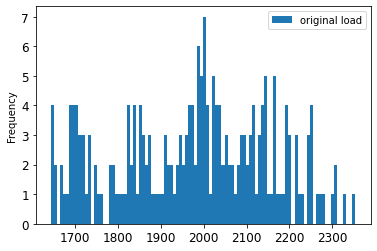

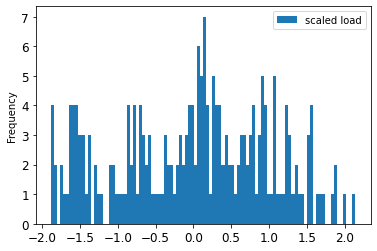

In [36]:
stlf_data[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8354) & (test.index <= 8565)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8354,-1.429253,-1.040084,1.307266,-1.498364,-1.004934,0.0,-0.627583,-0.283563,-0.037855,-1.715560,-0.831852,0.308870,-0.720448,-1.202392
8355,-1.514326,-1.203740,1.429646,-1.498364,-1.004934,0.0,-0.785190,-0.306201,-0.214049,-1.800083,-0.902613,0.189161,-0.837186,-1.395224
8356,-1.508654,-1.203740,1.429646,-1.357685,-1.004934,0.0,-1.252379,-0.340158,-0.390243,-1.969130,-0.886283,0.111703,-0.937752,-1.383881
8357,-1.491640,-1.203740,1.429646,-1.357685,-1.004934,0.0,-1.381841,-0.577857,-0.492550,-1.944270,-1.011476,-0.036172,-1.027706,-1.571041
8358,-1.446267,-1.232066,1.423651,-1.357685,-1.004934,0.0,-1.409985,-0.640112,-0.293621,-1.924382,-0.897170,-0.191088,-1.131304,-1.554027
8359,-1.468954,-1.260391,1.417656,-1.357685,-1.004934,0.0,-1.494417,-0.798578,-0.316356,-1.969130,-1.022362,-0.367129,-1.234902,-1.582384
8360,-1.582384,-1.260391,1.417656,-1.217006,-1.004934,0.0,-1.488788,-1.268317,-0.350458,-1.909466,-1.093123,-0.402338,-1.345575,-1.622085
8361,-1.656114,-1.260391,1.417656,-1.217006,-1.004934,0.0,-1.471902,-1.398486,-0.589172,-1.939298,-1.180214,-0.324879,-1.441593,-1.639100
8362,-1.729844,-1.341170,1.432383,-1.217006,-1.004934,0.0,-1.426872,-1.426783,-0.651693,-1.984045,-1.256418,-0.303754,-1.538622,-1.616413
8363,-1.758202,-1.421949,1.447110,-1.217006,-1.004934,0.0,-1.449387,-1.511676,-0.810836,-2.003933,-1.201986,-0.317838,-1.624027,-1.554027


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8354,-1.429253,-1.040084,1.307266,-1.498364,-1.004934,0.0,-0.627583,-0.283563,-0.037855,-1.715560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.429253
8355,-1.514326,-1.203740,1.429646,-1.498364,-1.004934,0.0,-0.785190,-0.306201,-0.214049,-1.800083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.429253,-1.514326
8356,-1.508654,-1.203740,1.429646,-1.357685,-1.004934,0.0,-1.252379,-0.340158,-0.390243,-1.969130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.429253,-1.514326,-1.508654
8357,-1.491640,-1.203740,1.429646,-1.357685,-1.004934,0.0,-1.381841,-0.577857,-0.492550,-1.944270,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.429253,-1.514326,-1.508654,-1.491640
8358,-1.446267,-1.232066,1.423651,-1.357685,-1.004934,0.0,-1.409985,-0.640112,-0.293621,-1.924382,...,NaN,NaN,NaN,NaN,NaN,-1.429253,-1.514326,-1.508654,-1.491640,-1.446267
8359,-1.468954,-1.260391,1.417656,-1.357685,-1.004934,0.0,-1.494417,-0.798578,-0.316356,-1.969130,...,NaN,NaN,NaN,NaN,-1.429253,-1.514326,-1.508654,-1.491640,-1.446267,-1.468954
8360,-1.582384,-1.260391,1.417656,-1.217006,-1.004934,0.0,-1.488788,-1.268317,-0.350458,-1.909466,...,NaN,NaN,NaN,-1.429253,-1.514326,-1.508654,-1.491640,-1.446267,-1.468954,-1.582384
8361,-1.656114,-1.260391,1.417656,-1.217006,-1.004934,0.0,-1.471902,-1.398486,-0.589172,-1.939298,...,NaN,NaN,-1.429253,-1.514326,-1.508654,-1.491640,-1.446267,-1.468954,-1.582384,-1.656114
8362,-1.729844,-1.341170,1.432383,-1.217006,-1.004934,0.0,-1.426872,-1.426783,-0.651693,-1.984045,...,NaN,-1.429253,-1.514326,-1.508654,-1.491640,-1.446267,-1.468954,-1.582384,-1.656114,-1.729844
8363,-1.758202,-1.421949,1.447110,-1.217006,-1.004934,0.0,-1.449387,-1.511676,-0.810836,-2.003933,...,-1.429253,-1.514326,-1.508654,-1.491640,-1.446267,-1.468954,-1.582384,-1.656114,-1.729844,-1.758202


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8364,-1.809246,-1.421949,1.447110,-1.076327,-1.004934,0.0,-1.561962,-1.506017,-1.282581,-2.018849,...,-1.514326,-1.508654,-1.491640,-1.446267,-1.468954,-1.582384,-1.656114,-1.729844,-1.758202,-1.809246
8365,-1.854618,-1.421949,1.447110,-1.076327,-1.004934,0.0,-1.635137,-1.489038,-1.413305,-2.058625,...,-1.508654,-1.491640,-1.446267,-1.468954,-1.582384,-1.656114,-1.729844,-1.758202,-1.809246,-1.854618
8366,-1.882975,-1.282422,1.302669,-1.076327,-1.004934,0.0,-1.708311,-1.443762,-1.441724,-1.998961,...,-1.491640,-1.446267,-1.468954,-1.582384,-1.656114,-1.729844,-1.758202,-1.809246,-1.854618,-1.882975
8367,-1.814917,-1.142894,1.158229,-1.076327,-1.004934,0.0,-1.736455,-1.466400,-1.526979,-2.033765,...,-1.446267,-1.468954,-1.582384,-1.656114,-1.729844,-1.758202,-1.809246,-1.854618,-1.882975,-1.814917
8368,-1.871632,-1.142894,1.158229,-0.935648,-1.004934,0.0,-1.787114,-1.579590,-1.521295,-2.018849,...,-1.468954,-1.582384,-1.656114,-1.729844,-1.758202,-1.809246,-1.854618,-1.882975,-1.814917,-1.871632


In [40]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8364,-1.588056
8365,-1.605070
8366,-1.542684
8367,-1.480297
8368,-1.298808
...,...
8461,-0.913143
8462,-0.691954
8463,-0.629567
8464,-0.606881


In [41]:
X_test = test_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
8364,-1.809246,-1.809246,-1.758202,-1.729844,-1.656114,-1.582384,-1.468954,-1.446267,-1.491640,-1.508654,...,-1.076327,-1.004934,0.0,-1.561962,-1.506017,-1.282581,-2.018849,-1.212872,-0.493879,-1.672036
8365,-1.854618,-1.854618,-1.809246,-1.758202,-1.729844,-1.656114,-1.582384,-1.468954,-1.446267,-1.491640,...,-1.076327,-1.004934,0.0,-1.635137,-1.489038,-1.413305,-2.058625,-1.234645,-0.536129,-1.712464
8366,-1.882975,-1.882975,-1.854618,-1.809246,-1.758202,-1.729844,-1.656114,-1.582384,-1.468954,-1.446267,...,-1.076327,-1.004934,0.0,-1.708311,-1.443762,-1.441724,-1.998961,-1.180214,-0.606546,-1.752893
8367,-1.814917,-1.814917,-1.882975,-1.854618,-1.809246,-1.758202,-1.729844,-1.656114,-1.582384,-1.468954,...,-1.076327,-1.004934,0.0,-1.736455,-1.466400,-1.526979,-2.033765,-1.147555,-0.669920,-1.779677
8368,-1.871632,-1.871632,-1.814917,-1.882975,-1.854618,-1.809246,-1.758202,-1.729844,-1.656114,-1.582384,...,-0.935648,-1.004934,0.0,-1.787114,-1.579590,-1.521295,-2.018849,-1.174770,-0.768504,-1.812020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,-1.639100,-1.639100,-1.622085,-1.582384,-1.554027,-1.571041,-1.383881,-1.395224,-1.202392,-1.259107,...,-1.076327,0.516823,0.0,-1.550705,-1.256998,-1.123438,-1.253168,-1.637438,-1.416336,-1.475957
8462,-1.616413,-1.616413,-1.639100,-1.622085,-1.582384,-1.554027,-1.571041,-1.383881,-1.395224,-1.202392,...,-1.076327,0.516823,0.0,-1.533819,-1.200403,-1.021132,-1.278028,-1.572120,-1.345919,-1.530030
8463,-1.554027,-1.554027,-1.616413,-1.639100,-1.622085,-1.582384,-1.554027,-1.571041,-1.383881,-1.395224,...,-1.076327,0.516823,0.0,-1.561962,-1.392826,-1.083652,-1.218364,-1.610222,-1.303669,-1.572986
8464,-1.588056,-1.588056,-1.554027,-1.616413,-1.639100,-1.622085,-1.582384,-1.554027,-1.571041,-1.383881,...,-0.935648,0.516823,0.0,-1.601364,-1.381507,-1.316683,-1.268084,-1.593893,-1.338878,-1.598254


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 24, 1)

In [43]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 24, 1)

In [44]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(102,2,1,12)

In [45]:
predictions = model.predict(X_test)
predictions

array([[-1.5123758 ],
       [-1.523572  ],
       [-1.4898905 ],
       [-1.445046  ],
       [-1.4469724 ],
       [-1.4418392 ],
       [-1.3657017 ],
       [-1.2439263 ],
       [-0.93745685],
       [-0.67803913],
       [-0.45278835],
       [-0.37804124],
       [-0.27354413],
       [-0.21198195],
       [-0.14619231],
       [ 0.00295077],
       [ 0.11956515],
       [ 0.14179459],
       [ 0.22757086],
       [ 0.17782122],
       [ 0.11952653],
       [ 0.0719342 ],
       [ 0.34699982],
       [ 0.49969083],
       [ 0.5769272 ],
       [ 0.40161946],
       [ 0.48408806],
       [ 0.44096866],
       [ 0.39006183],
       [ 0.44268584],
       [ 0.5042505 ],
       [ 0.6451778 ],
       [ 0.62555796],
       [ 0.5587328 ],
       [ 0.56945366],
       [ 0.50345224],
       [ 0.4908089 ],
       [ 0.5196778 ],
       [ 0.62536293],
       [ 0.6803555 ],
       [ 0.41124493],
       [ 0.29069847],
       [ 0.27317962],
       [ 0.35745   ],
       [ 0.5921498 ],
       [ 0

In [46]:
feature=stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1976.004717
dtype: float64
Cons    176.736516
dtype: float64


In [47]:
load_mean=1976.004717
load_std=176.736516
rescaled_target_load=(y_test*load_std)+load_mean
rescaled_target_load

,y_t+100
8364,1695.337266
8365,1692.330166
8366,1703.356201
8367,1714.382237
8368,1746.457977
...,...
8461,1814.618923
8462,1853.711231
8463,1864.737267
8464,1868.746734


In [48]:
rescaled_predicted_load=(predictions*load_std)+load_mean
rescaled_predicted_load

array([[1708.7128],
       [1706.734 ],
       [1712.6868],
       [1720.6124],
       [1720.272 ],
       [1721.1791],
       [1734.6354],
       [1756.1576],
       [1810.3219],
       [1856.1705],
       [1895.9805],
       [1909.191 ],
       [1927.6595],
       [1938.5398],
       [1950.1672],
       [1976.5262],
       [1997.1362],
       [2001.0651],
       [2016.2249],
       [2007.4323],
       [1997.1295],
       [1988.7181],
       [2037.3323],
       [2064.3184],
       [2077.9688],
       [2046.9856],
       [2061.5608],
       [2053.94  ],
       [2044.9429],
       [2054.2434],
       [2065.1243],
       [2090.0312],
       [2086.5637],
       [2074.7532],
       [2076.648 ],
       [2064.9832],
       [2062.7485],
       [2067.8508],
       [2086.5293],
       [2096.2485],
       [2048.6868],
       [2027.3818],
       [2024.2855],
       [2039.1792],
       [2080.6592],
       [2113.8298],
       [2121.134 ],
       [2129.0552],
       [2127.5278],
       [2111.0767],


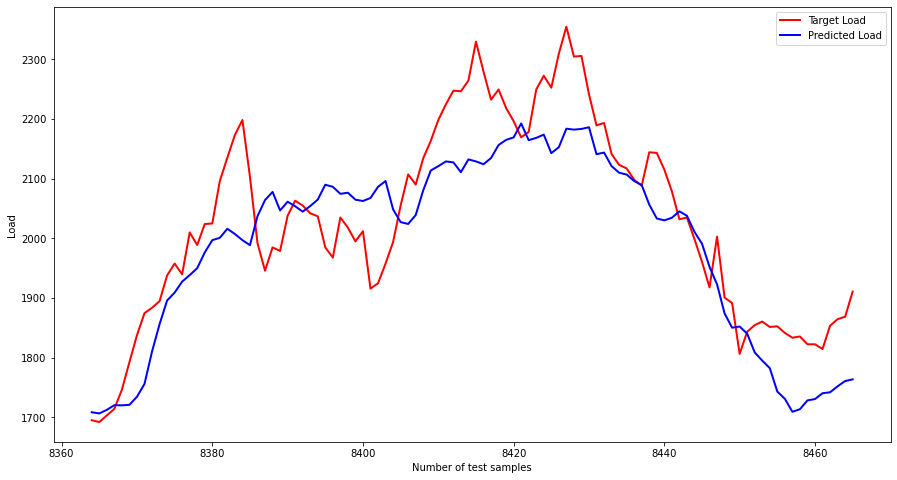

In [49]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

3.5330368607140525


In [51]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100    1.986581
dtype: float64


In [52]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8364  169432.937689
8365  169132.165463
8366  170235.072365
8367  171337.860285
8368  174547.297040
...             ...
8461  181365.972622
8462  185277.140564
8463  186379.762040
8464  186780.438380
8465  190992.307420

[102 rows x 1 columns]


In [53]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

           y_t+100
8364    178.904056
8365    207.470691
8366     87.059465
8367     38.815265
8368    685.706804
...            ...
8461   5482.130223
8462  12442.498525
8463  12666.076138
8464  11606.281215
8465  21610.313548

[102 rows x 1 columns]
y_t+100    7586.492384
dtype: float64


In [54]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    87.100473
dtype: float64


In [55]:
a=np.array(rescaled_predicted_load)

In [56]:
for i in  range(0,102):
    b=a[i]
    print(b)

[1708.7128]
[1706.734]
[1712.6868]
[1720.6124]
[1720.272]
[1721.1791]
[1734.6354]
[1756.1576]
[1810.3219]
[1856.1705]
[1895.9805]
[1909.191]
[1927.6595]
[1938.5398]
[1950.1672]
[1976.5262]
[1997.1362]
[2001.0651]
[2016.2249]
[2007.4323]
[1997.1295]
[1988.7181]
[2037.3323]
[2064.3184]
[2077.9688]
[2046.9856]
[2061.5608]
[2053.94]
[2044.9429]
[2054.2434]
[2065.1243]
[2090.0312]
[2086.5637]
[2074.7532]
[2076.648]
[2064.9832]
[2062.7485]
[2067.8508]
[2086.5293]
[2096.2485]
[2048.6868]
[2027.3818]
[2024.2855]
[2039.1792]
[2080.6592]
[2113.8298]
[2121.134]
[2129.0552]
[2127.5278]
[2111.0767]
[2132.4656]
[2129.0999]
[2124.4045]
[2134.763]
[2156.56]
[2165.1968]
[2169.306]
[2192.6995]
[2164.6487]
[2168.5317]
[2173.9954]
[2142.9229]
[2152.9631]
[2183.9727]
[2182.3896]
[2183.5173]
[2186.379]
[2141.1562]
[2143.9395]
[2121.2131]
[2110.1326]
[2107.0947]
[2096.2324]
[2089.4104]
[2056.8462]
[2033.5023]
[2030.3094]
[2034.6118]
[2045.4486]
[2038.0405]
[2011.1466]
[1991.2017]
[1952.3633]
[1923.0695]
[187